# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_base = f"{url}appid={weather_api_key}&units={units}&q="

# Create lists for each measurement
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [5]:
city_n = 1

# Loop through cities
for city in cities:
    
    # Get response from OpenWeather API
    response_json = requests.get(query_base + city).json()
    
    # Append measurements to the prepared lists & print message 
    try:
        
        name = response_json[ 'name']
        city_name.append( name)
        
        lat = response_json[ 'coord'][ 'lat']
        latitude.append( lat)

        lng = response_json[ 'coord'][ 'lon']
        longitude.append( lng)

        temp = response_json[ 'main'][ 'temp']
        max_temp.append( temp)

        hum = response_json[ 'main'][ 'humidity']
        humidity.append( hum)

        clouds = response_json[ 'clouds'][ 'all']
        cloudiness.append( clouds)

        wind = response_json[ 'wind'][ 'speed']
        wind_speed.append( wind)
        
        country_name = response_json[ 'sys'][ 'country']
        country.append( country_name)

        date_n = response_json[ 'dt']
        date.append( date_n)

    
        print( f'City {city_n}: {city}')
        
        city_n = city_n + 1
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print( 'City not found. Skipped...')
      

Beginning Data Retrieval 
-----------------------------
City 1: kahului
City 2: ushuaia
City 3: ploemeur
City not found. Skipped...
City 4: punta arenas
City 5: carnarvon
City 6: chokurdakh
City 7: mataura
City 8: mount isa
City 9: new norfolk
City 10: kuandian
City 11: lebu
City 12: avarua
City 13: rikitea
City 14: saint-philippe
City 15: havre-saint-pierre
City 16: puro
City 17: bay city
City 18: victor harbor
City 19: sitka
City 20: yellowknife
City 21: kaitangata
City 22: mormugao
City 23: dikson
City 24: karratha
City not found. Skipped...
City 25: korla
City 26: poum
City 27: piacabucu
City 28: tigil
City 29: san quintin
City 30: vrangel
City 31: klaksvik
City 32: goundam
City 33: aire-sur-la-lys
City 34: busselton
City 35: lianzhou
City 36: qaanaaq
City not found. Skipped...
City 37: antalaha
City 38: butaritari
City 39: abonnema
City 40: norman wells
City 41: chuy
City 42: nazca
City not found. Skipped...
City 43: muisne
City 44: nishihara
City 45: teahupoo
City 46: hilo
City 4

City 379: burnie
City 380: eyrarbakki
City 381: ternate
City 382: teguldet
City 383: qaqortoq
City 384: sekoma
City 385: ambilobe
City 386: porto torres
City 387: constitucion
City 388: chumikan
City 389: bereda
City 390: pran buri
City 391: ozernovskiy
City 392: povenets
City 393: port macquarie
City 394: aykhal
City 395: takoradi
City 396: japura
City 397: shintomi
City 398: kudahuvadhoo
City 399: singapore
City 400: xining
City 401: bowmore
City 402: nemuro
City 403: monywa
City not found. Skipped...
City 404: kitgum
City 405: abu kamal
City 406: nurota
City 407: maturin
City 408: lipin bor
City 409: severo-yeniseyskiy
City 410: general roca
City 411: vilhena
City 412: malakal
City 413: bure
City 414: barabai
City 415: saint-joseph
City 416: harnosand
City 417: voh
City 418: sarlat-la-caneda
City 419: rawson
City 420: oster
City 421: magadan
City 422: nongan
City 423: burgdorf
City 424: gunnedah
City 425: markivka
City 426: san jose
City 427: manaus
City 428: mashhad
City 429: qubal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Lat': latitude,
    'Lng': longitude,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

# Save to .csv file
weather_df.to_csv("../output_data/cities.csv", index = False)

# Display the DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,81.90,62,20,13.80,US,1630005224
1,Ushuaia,-54.8000,-68.3000,40.62,48,0,0.81,AR,1630005309
2,Ploemeur,47.7333,-3.4333,64.67,76,90,12.66,FR,1630005310
3,Punta Arenas,-53.1500,-70.9167,41.11,70,40,8.05,CL,1630005310
4,Carnarvon,-24.8667,113.6333,59.07,71,0,11.50,AU,1630005311


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,19.673660,18.382649,67.938769,69.908938,54.317032,7.952951,1.630005e+09
std,33.571783,89.364918,15.244502,22.021300,41.304334,5.567224,9.378680e+01
min,-54.800000,-179.166700,31.960000,7.000000,0.000000,0.000000,1.630005e+09
25%,-7.938600,-62.272400,56.160000,57.000000,8.000000,3.620000,1.630005e+09
50%,22.276900,24.728400,70.090000,76.000000,63.000000,6.670000,1.630005e+09
75%,48.416700,95.228300,78.760000,87.000000,100.000000,11.500000,1.630005e+09
max,78.218600,179.316700,108.050000,100.000000,100.000000,37.000000,1.630006e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

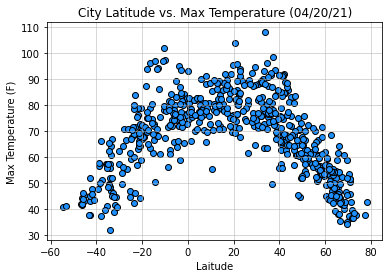

In [17]:

plt.scatter( weather_df[ 'Lat'], weather_df[ 'Max Temp'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Max Temperature (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Max Temperature (F)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/LatvTemp.png')
plt.show()

## Latitude vs. Humidity Plot

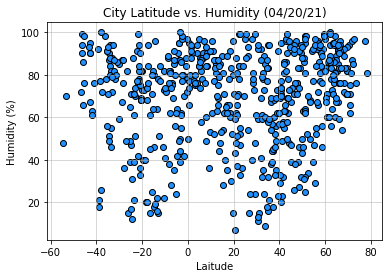

In [18]:
plt.scatter( weather_df[ 'Lat'], weather_df[ 'Humidity'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Humidity (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Humidity (%)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/LatvHum.png')
plt.show()

## Latitude vs. Cloudiness Plot

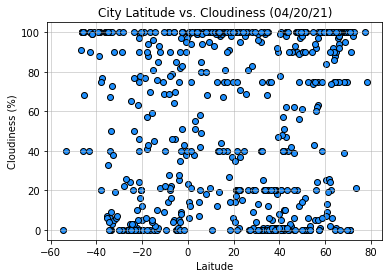

In [19]:

plt.scatter( weather_df[ 'Lat'], weather_df[ 'Cloudiness'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Cloudiness (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Cloudiness (%)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/LatvCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

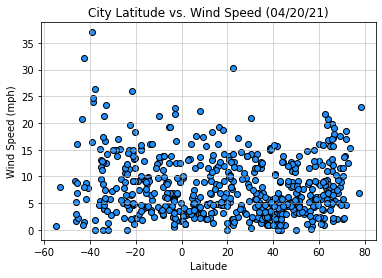

In [20]:
plt.scatter( weather_df[ 'Lat'], weather_df[ 'Wind Speed'], facecolor= 'dodgerblue', edgecolor= 'k')

# Set title and labels
plt.title( 'City Latitude vs. Wind Speed (04/20/21)')
plt.xlabel( 'Laitude')
plt.ylabel( 'Wind Speed (mph)')

# Set grid line
plt.grid( linestyle= '-', linewidth= 1, alpha= 0.5)

# Save .png of plot and show output
plt.savefig( '../output_data/LatvWindpng')
plt.show()

## Linear Regression

In [14]:
def scatter_plot( x_values, y_values, x_label, y_label, title, regress):
    
    plt.scatter( x_values, y_values)
        
    (slope, intercept, rvalue, pvalue, stderr) = linregress( x_values, y_values)

    # Write out information for annotation
    regression = x_values * slope + intercept
    equation = f'y = { slope:,.2f}x + { intercept:,.2f}'
    r_sq = f'r-squared = { rvalue:,.2f}'
    plt.plot( x_values, regression, 'r-')
       
    # Indicate annotation position on chart
    x_placement = round(np.percentile( x_values, 10), 0)
    y_placement = round(np.percentile( regression, 0), 0)
    
    # Annotate chart
    plt.annotate( equation, ( x_placement, y_placement), fontsize= 15, color= 'r')
    plt.annotate( r_sq, ( x_placement, y_placement - 6), fontsize= 15, color= 'r')
    
    # Add title and labels
    plt.title( title)
    plt.xlabel( x_label)
    plt.ylabel (y_label)
        
    # Save plot images to the Output Data folder
    plt.savefig( f'../output_data/{region}-{measure}.png')
    plt.show()

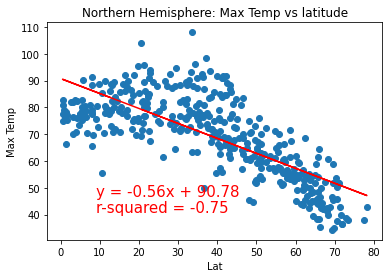

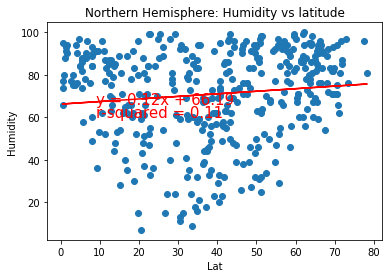

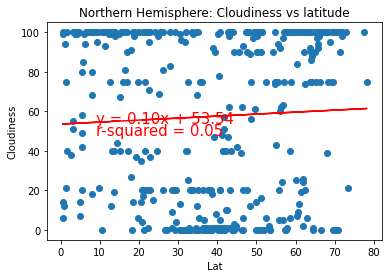

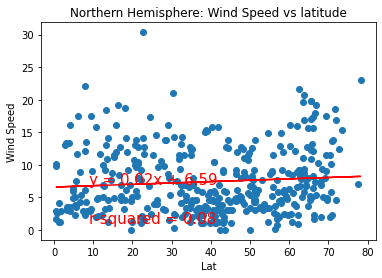

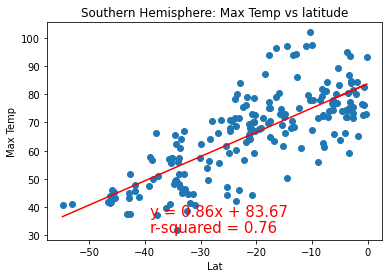

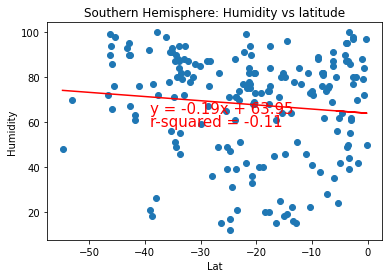

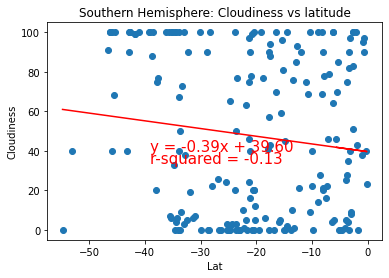

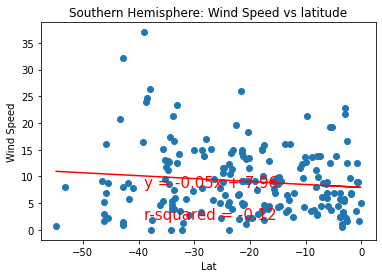

In [16]:
n_hemisphere = weather_df[ weather_df[ 'Lat'] >= 0]
s_hemisphere = weather_df[ weather_df[ 'Lat'] < 0]

regions = [ 'Northern Hemisphere', 'Southern Hemisphere']
measure_vs_lat = [ 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

for region in regions:
    for measure in measure_vs_lat:
        if region == 'Northern Hemisphere':
            data = n_hemisphere
        elif region == 'Southern Hemisphere':
            data = s_hemisphere
        x_values = data[ 'Lat']
        y_values = data[ measure]
        x_label = 'Lat'
        y_label = measure
        title = f'{region}: {measure} vs latitude'
        scatter_plot( x_values, y_values, x_label, y_label, title, linregress)